In [128]:
from IPython.display import clear_output, display
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from time import sleep
import random
from os import system

In [131]:
# Print every frames during the training process
def print_frames(frame, timestamp):
    if isinstance(frame['frame'], np.ndarray):
        # print frames as image from rgb array
        plt.imshow(frame['frame'])
        plt.title("State: %d\nAction: %d\nReward: %d\nEpisodes: %d" % (frame['state'], frame['action'], frame['reward'], frame['episodes']))
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())
        plt.clf()
    else:
        # print frames in terminal
        clear_output(wait=True)
        print(frame['frame'])
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Action: {frame['action']}")
        print(f"Eposides: {frame['episodes']}")
    sleep(timestamp)

In [132]:
# local gymnasium library
env = TaxiEnv(render_mode="rgb_array")

# Generate gymnasium environment variables
# env = gym.make("Taxi-v3", render_mode="rgb_array").env
state, info = env.reset()

penalties, reward = 0, 0
frames = []
done = False

In [133]:
# clear terminal
system('clear')

# Generate Q-learning training algorithm required variable
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# train environment variables
alpha = 0.1
gamma = 0.6
epsilon = 0.1
all_epochs = []
all_penalties = []

training_episodes = 35000 # Number of episode to run in train process

# test environment variables
test_episodes = 5 # Number of episode to run in test process
total_epochs, total_penalties = 0, 0

In [134]:
for i in range(training_episodes):
    state = env.reset()[0]
    done = False
    penalties, reward, = 0, 0

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, truncated, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1
        state = next_state

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i} / {training_episodes}")

Episode: 34900 / 35000


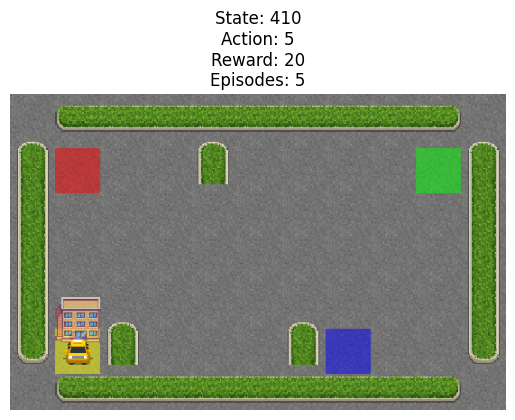

Results after 5 episodes:
Average timesteps per episode: 10.8
Average penalties per episode: 0.0


In [135]:
for i in range(test_episodes):
    state = env.reset()[0]
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, truncated, info = env.step(action)
        if reward == -10:
            penalties += 1
        epochs += 1
        system('clear')

        frame = {
            'frame': env.render(),
            'state': state,
            'action': action,
            'reward': reward,
            'episodes': i+1,
        }
        print_frames(frame, 0.1)

    total_penalties += penalties
    total_epochs += epochs

plt.close()
print(f"Results after {test_episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / test_episodes}")
print(f"Average penalties per episode: {total_penalties / test_episodes}")